In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [2]:
# Loading in the dataset and viewing the first few rows
df = pd.read_csv('cleaned_titanic_df.txt')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,...,title,male,cabin_deck,Embarked_s,Embarked_q,Embarked_c,family_size,is_alone,is_child,is_senior
0,0,1,0,3,male,22.0,1,0,7.2500,NaN,...,Mr,1,6,1,0,0,2,0,0,0
1,1,2,1,1,female,38.0,1,0,71.2833,C85,...,Mrs,0,3,0,0,1,2,0,0,0
2,2,3,1,3,female,26.0,0,0,7.9250,NaN,...,Miss,0,6,1,0,0,1,1,0,0
3,3,4,1,1,female,35.0,1,0,53.1000,C123,...,Mrs,0,3,1,0,0,2,0,0,0
4,4,5,0,3,male,35.0,0,0,8.0500,NaN,...,Mr,1,6,1,0,0,1,1,0,0


In [3]:
# Removing columns that are not required
df.drop(columns=['Unnamed: 0', 'PassengerId', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'male', 'cabin_deck', 'Embarked_s', 
                 'Embarked_q', 'Embarked_c', 'family_size', 'is_alone', 'is_child', 'is_senior'], inplace=True)

# One sample t-test

In [5]:
# Getting the fares for people who embarked at 'c'
emb_c_fares = df.Fare[df.Embarked=='C']

In [6]:
# Getting the mean fare for the sample of embarked C and the entire df
emb_c_fares_mean = emb_c_fares.mean()
print('The mean fare for people who embarked from C is ' + str(emb_c_fares_mean))

fares_mean = df.Fare.mean()
print('The mean fare for the dataset is ' + str(fares_mean))

The mean fare for people who embarked from C is 40.98664743589744
The mean fare for the dataset is 26.53017037887486


In [7]:
# Implementing a one sample t-test with the sample of fares for embarked c
tstat, pval = stats.ttest_1samp(emb_c_fares, fares_mean)

print('The tstat is: ' + str(tstat))
print('The pval is: ' + str(pval))

# The tstat is positive indicating that the sample of embarked C fares is greater.
# The p-value is below the significance threshold meaning we reject the null hypothesis.
# The resulting p-value is for a two tailed test so if the sample is greater or smaller than the population.
# To get the p-value to see if the sample is greater we do p-value/2, which is going to make it even more significant 

The tstat is: 4.811731691373208
The pval is: 3.520186548935161e-06


In [8]:
# t-statistic
# Finding the quantiles of the t distribution
print(stats.t.ppf(q=0.025, df=870))
print(stats.t.ppf(q=0.975, df=870))
# tstat is outside the quantiles highlighting again we reject the null

-1.9626944659891674
1.962694465989167


# Two sample t-test

In [10]:
# Finding the mean age for both men and women in the dataset
male_age_mean = df.Age[df.Sex=='male'].mean()
print('The mean age for males is ' + str(male_age_mean))

female_age_mean = df.Age[df.Sex=='female'].mean()
print('The mean age for females is ' + str(female_age_mean))   

The mean age for males is 30.74898066783831
The mean age for females is 27.86092715231788


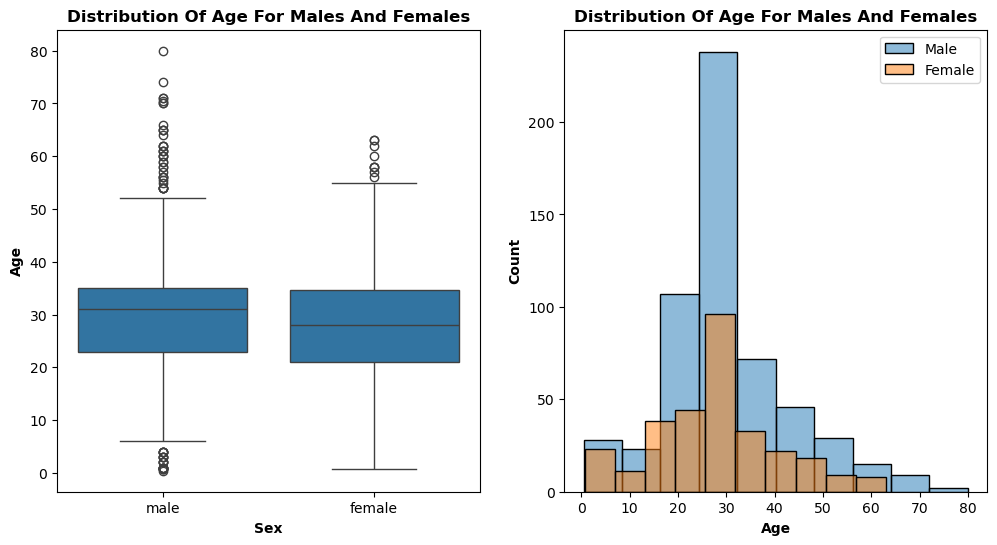

In [14]:
# Viusalising the spread of age for both men and women
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=df.Sex, y=df.Age)
plt.title('Distribution Of Age For Males And Females', weight='bold')
plt.xlabel('Sex', weight='bold')
plt.ylabel('Age', weight='bold')

plt.subplot(1,2,2)
sns.histplot(df.Age[df.Sex=='male'], alpha=0.5, bins=10)
sns.histplot(df.Age[df.Sex=='female'], alpha=0.5, bins=10)
plt.title('Distribution Of Age For Males And Females', weight='bold')
plt.legend(['Male', 'Female'])
plt.xlabel('Age', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

# Checking the assumptions of a two sample t-test

In [15]:
# 2. The stds of the groups should be equal 
male_female_std = np.std(df.Age[df.Sex == 'male']) / np.std(df.Age[df.Sex == 'female'])
print(male_female_std) 
# The stds difference is between the threshold of 0.9 - 1.1

1.0072173247740073


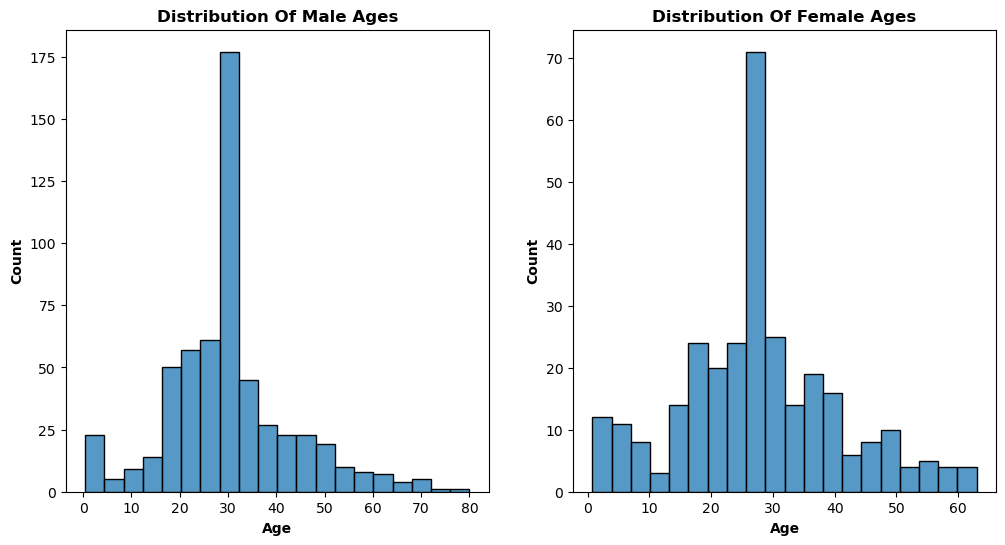

In [29]:
# 3. The data should be normally distributed

# Visualising the distribution of both male and female ages
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df.Age[df.Sex=='male'], bins=20)
plt.title('Distribution Of Male Ages', weight='bold')
plt.xlabel('Age', weight='bold')
plt.ylabel('Count', weight='bold')

plt.subplot(1,2,2)
sns.histplot(df.Age[df.Sex=='female'], bins=20)
plt.title('Distribution Of Female Ages', weight='bold')
plt.xlabel('Age', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

# Both age groups are normally distributed enough

# Implementing the two sample t-test

In [18]:
# Running a two sample t-test
tstat, pval = stats.ttest_ind(df.Age[df.Sex=='male'], df.Age[df.Sex=='female'])
print('Tstat: ' + str(tstat))
print('Pval: ' + str(pval))

# The tstat is positive indicating that the sample of male ages is greater.
# The resulting p-value is under the significance threshold, this is for a two tailed test.
# By halving the p-value to get the result for one tailed test, the p-value becomes even lower and more significant.
# Meaning we reject the null hypothesis.
# Males have significantly greater ages than females on the titanic.

Tstat: 3.126507389500674
Pval: 0.0018278068999089579


# Two sample t-test

In [19]:
# Calulating the mean fare for both men and women
male_fare_mean = df.Fare[df.Sex=='male'].mean()
print('The mean fare for males is ' + str(male_fare_mean))

female_fare_mean = df.Fare[df.Sex=='female'].mean()
print('The mean fare for females is ' + str(female_fare_mean))

The mean fare for males is 21.56116537785589
The mean fare for females is 35.89230231788079


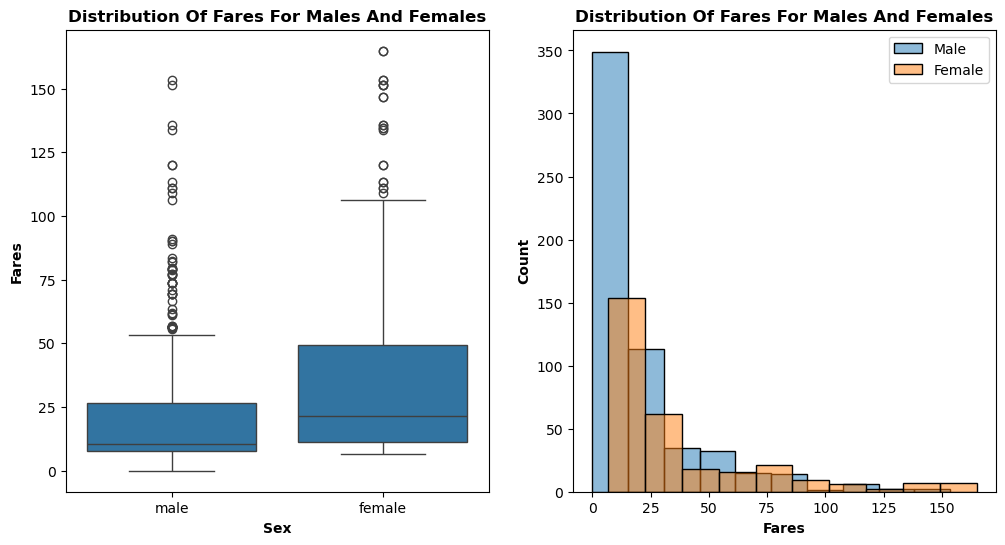

In [23]:
# Viusalising the spread of fare for both men and women
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=df.Sex, y=df.Fare)
plt.title('Distribution Of Fares For Males And Females', weight='bold')
plt.xlabel('Sex', weight='bold')
plt.ylabel('Fares', weight='bold')

plt.subplot(1,2,2)
sns.histplot(df.Fare[df.Sex=='male'], alpha=0.5, bins=10)
sns.histplot(df.Fare[df.Sex=='female'], alpha=0.5, bins=10)
plt.title('Distribution Of Fares For Males And Females', weight='bold')
plt.xlabel('Fares', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(['Male', 'Female'])
plt.show()

# Checking the assumptions of a two sample t-test

In [24]:
# 2. The stds of the groups should be equal 
male_female_std_fares = np.std(df.Fare[df.Sex == 'male']) / np.std(df.Fare[df.Sex == 'female'])
print('Initial std difference '  + str(male_female_std_fares)) 

Initial std difference 0.64773284197651


In [26]:
# We can see that the stds of both samples are not equal, to combat this I will reduce the spread of the samples.
# Reducing the spread of fare to balance out the std difference
fare_92_quant = df.Fare.quantile(0.92)
# The fares have been reduced to the 92 quantile which is a fare of 77.5
# After testing this is the highest possible quantile that keeps the most data and meets the std assumption.

In [27]:
# Creating a new df where the max fare is 77.5/92nd quantile
df_fare = df[df['Fare'] <= fare_92_quant] 

In [28]:
# Checking the std difference of the reduced df
male_female_std_fares_2 = np.std(df_fare.Fare[df.Sex == 'male']) / np.std(df_fare.Fare[df.Sex == 'female'])
print('The std difference is ' + str(male_female_std_fares_2))
# The std difference in now in an acceptable range

The std difference is 0.9585785740682443


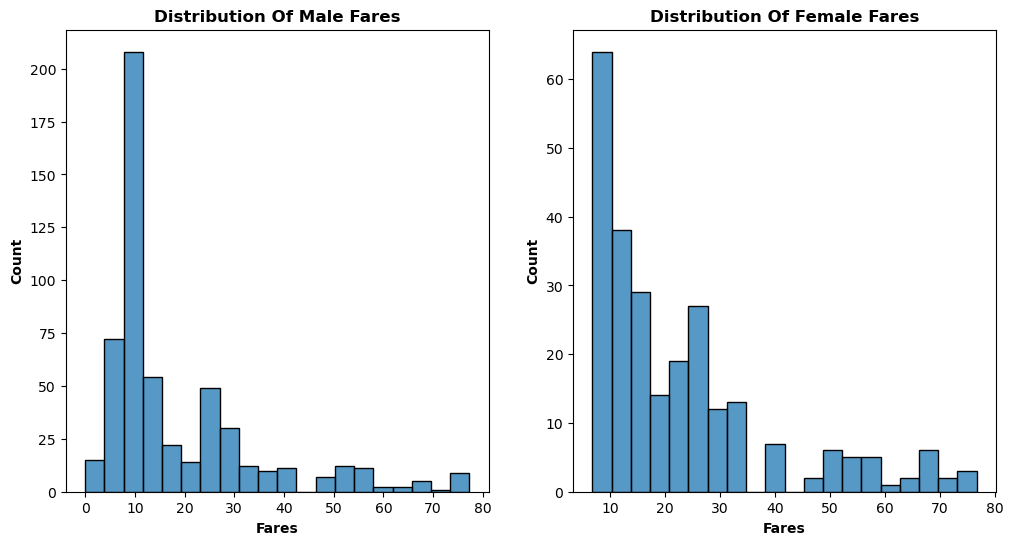

In [30]:
# 3. The data should be normally distributed

# Visualising the distribution of fare for men and women
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df_fare.Fare[df.Sex=='male'], bins=20)
plt.title('Distribution Of Male Fares', weight='bold')
plt.xlabel('Fares', weight='bold')
plt.ylabel('Count', weight='bold')

plt.subplot(1,2,2)
sns.histplot(df_fare.Fare[df.Sex=='female'], bins=20)
plt.title('Distribution Of Female Fares', weight='bold')
plt.xlabel('Fares', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

# We can see the actual data is very right skewed not meeting the assumption,
# but the assumption is mainly checking the sample distribution of the means is normally distributed.

In [31]:
# Creating a male and female df
male_df = df_fare[df_fare['Sex'] == 'male']
print(male_df.shape)
female_df = df_fare[df_fare['Sex'] == 'female']
print(female_df.shape)

(546, 10)
(255, 10)


In [36]:
# Calculating the sampling distribution of the means for the male and female fare
sample_size = 30
num_samples = 1000
male_sample_means = []
female_sample_means = []

# Creating a random sample of fares in both male and female dfs. Then calculating the mean and adding it to the list.
for _ in range(num_samples):
    sample = np.random.choice(male_df.Fare, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    male_sample_means.append(sample_mean)

for _ in range(num_samples):
    sample = np.random.choice(female_df.Fare, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    female_sample_means.append(sample_mean)

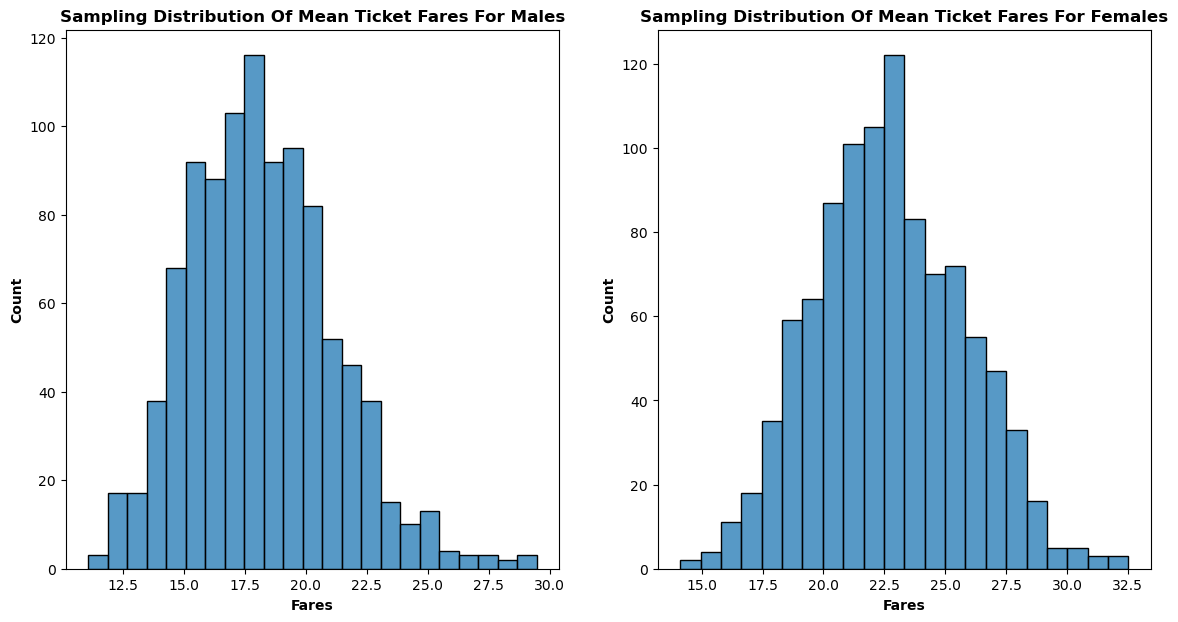

In [38]:
# Visualising the distribution of the means for both male and female fares
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.histplot(male_sample_means)
plt.title('Sampling Distribution Of Mean Ticket Fares For Males', weight='bold')
plt.xlabel('Fares', weight='bold')
plt.ylabel('Count', weight='bold')

plt.subplot(1,2,2)
sns.histplot(female_sample_means)
plt.title('Sampling Distribution Of Mean Ticket Fares For Females', weight='bold')
plt.xlabel('Fares', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()
# We can now see that the fares are normally distributed meeting the assumption.

# Implementing a two sample t-test

In [39]:
# Running the two sample t-test
tstat, pval = stats.ttest_ind(male_df.Fare, female_df.Fare)
print('Tstat: ' + str(tstat))
print('Pval: ' + str(pval))

# The tstat is negative indicating that the male fares is lower than the female fares.
# The resulting p-value for a two tailed test is under the significance threshold.
# By halving it for a one tailed test the p-value becomes even lower and more significant.
# This means we reject the null hypothesis.
# The male fare is significantly lower than the female fare.

Tstat: -3.6822859345104906
Pval: 0.0002467014451889059


# Chi-squared test

In [40]:
# Changing the values in the survived column to categorical outputs for the test
df.Survived = df.Survived.map({0:'Died', 1:'Survived'})

In [41]:
# Creating a table showing the counts for each gender and their survival status
table = pd.crosstab(df.Sex, df.Survived)
print(table)

Survived  Died  Survived
Sex                     
female      81       221
male       462       107


In [42]:
# Implementing a chi-squared test
chi2, pval, dof, expected = chi2_contingency(table)
print('The pval is ' + str(pval))

# The resulting p-value is under the significance threshold.
# Meaning we reject the null hypothesis.
# There is an association between gender and surviving the titanic.

The pval is 1.8007294843442673e-55


# Chi-squared test

In [29]:
# Calculating the mean and median price for the fare column
print(df.Fare.mean()) # 26.1
print(df.Fare.median()) # 13.5

# We can see a big difference in the mean and median. This is due to high fairs influencing the mean.
# Due to this I will use a rounded median value as the cut off for cheap vs expensive tickets.

26.157622711471614
13.5


In [43]:
# Changing the fare column to expensive if the price of the fare is above 14 and cheap if not
df.Fare = df.Fare.apply(lambda x: 'expensive' if x > 14.0 else 'cheap')

In [44]:
# Creating a table showing the counts for ticket category and survival status
table_2 = pd.crosstab(df.Fare, df.Survived)
print(table_2)

Survived   Died  Survived
Fare                     
cheap       326       111
expensive   217       217


In [45]:
# Implementing a chi-squared test
chi2, pval, dof, expected = chi2_contingency(table_2)
print('The pval is ' + str(pval))

# The resulting p-value is under the significance threshold.
# Meaning we reject the null hypothesis.
# There is an association between ticket price category and survival status of the titanic.

The pval is 1.1549963229144273e-13
